<a href="https://colab.research.google.com/github/thesuravaram/Data-Analysis-Visualization/blob/main/Lab_6_Grid_Search_CV_and_Support_Vector_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 6 - Grid Search CV and Support Vector Classifier**
<br>Suravaram Dhanush
<br>251580840034

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()
df['target']=data.target

print(f"Shape: {df.shape}")
print(f"Features: {list(data.feature_names)}")
print(f"Target Features: {data.target_names}")
print(f"Class distribution: {df['target'].value_counts()}")

Shape: (569, 31)
Features: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]
Target Features: ['malignant' 'benign']
Class distribution: target
1    357
0    212
Name: count, dtype: int64


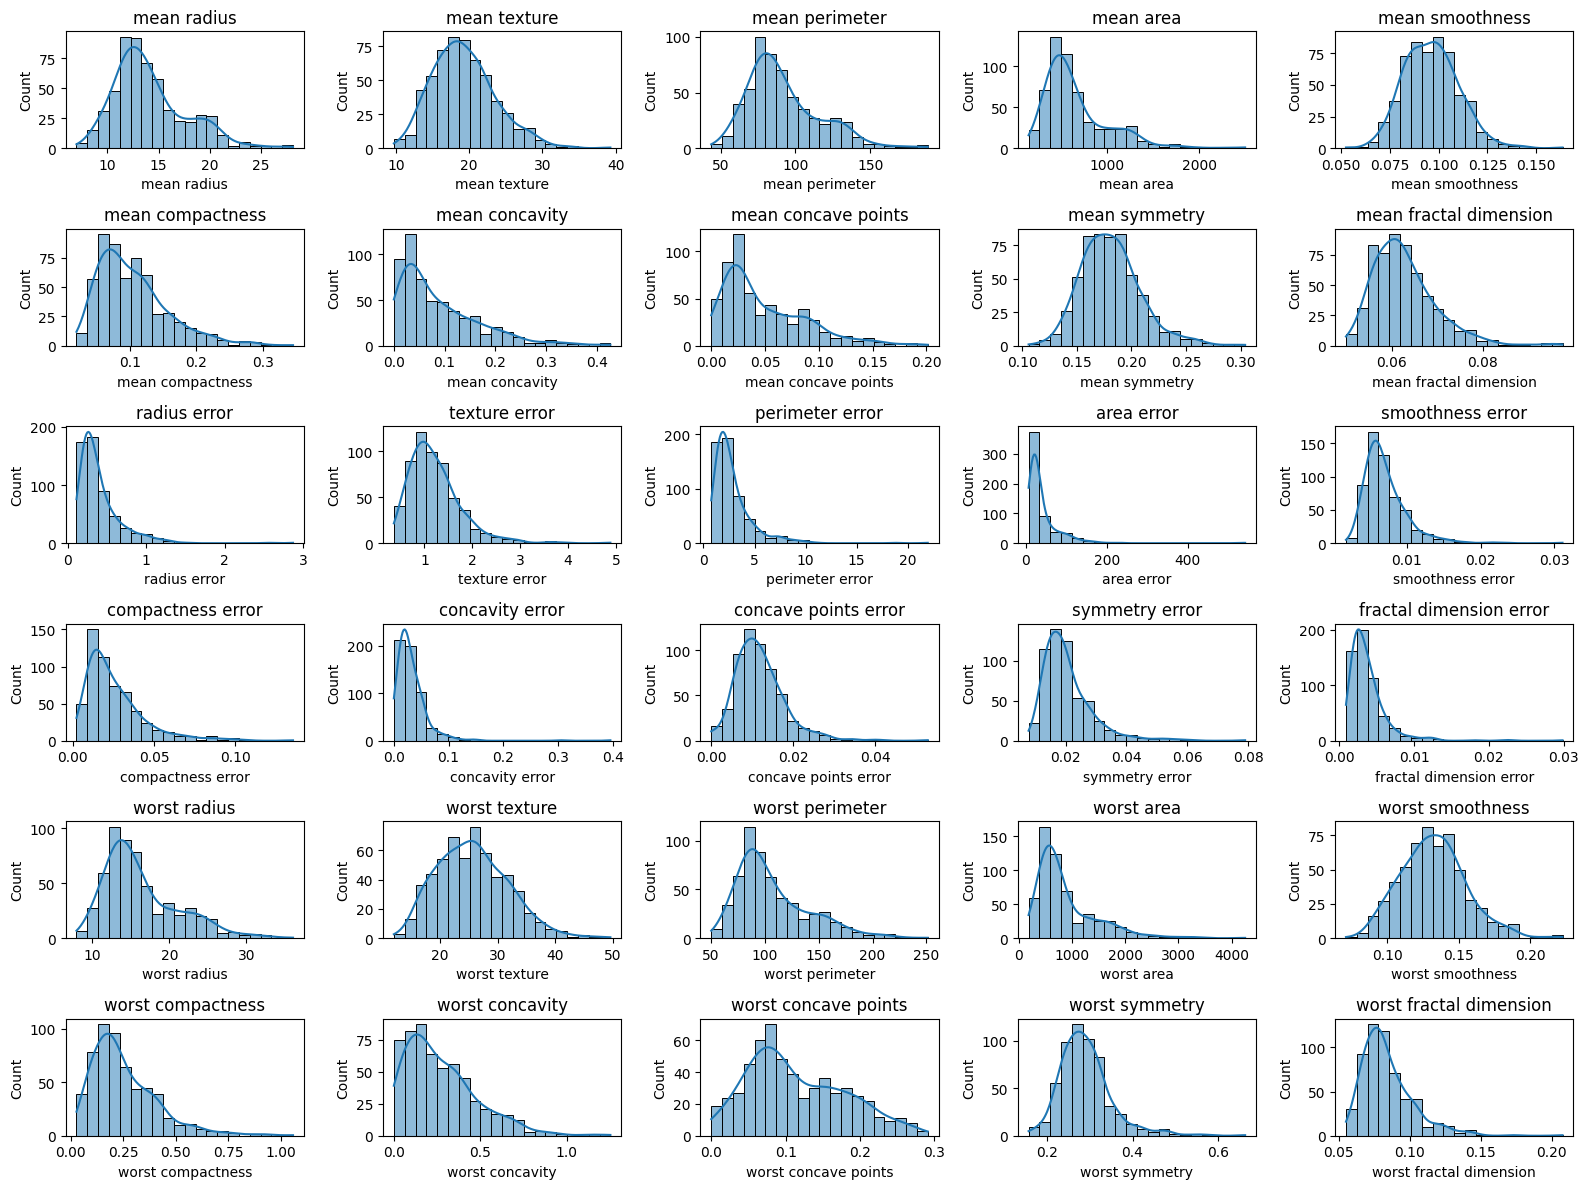

In [ ]:
plt.figure(figsize=(16,12))
for i,col in enumerate(df.columns[:-1]):
  plt.subplot(6,5,i+1)
  sns.histplot(df[col],kde=True,bins=20)
  plt.title(col)

plt.tight_layout()

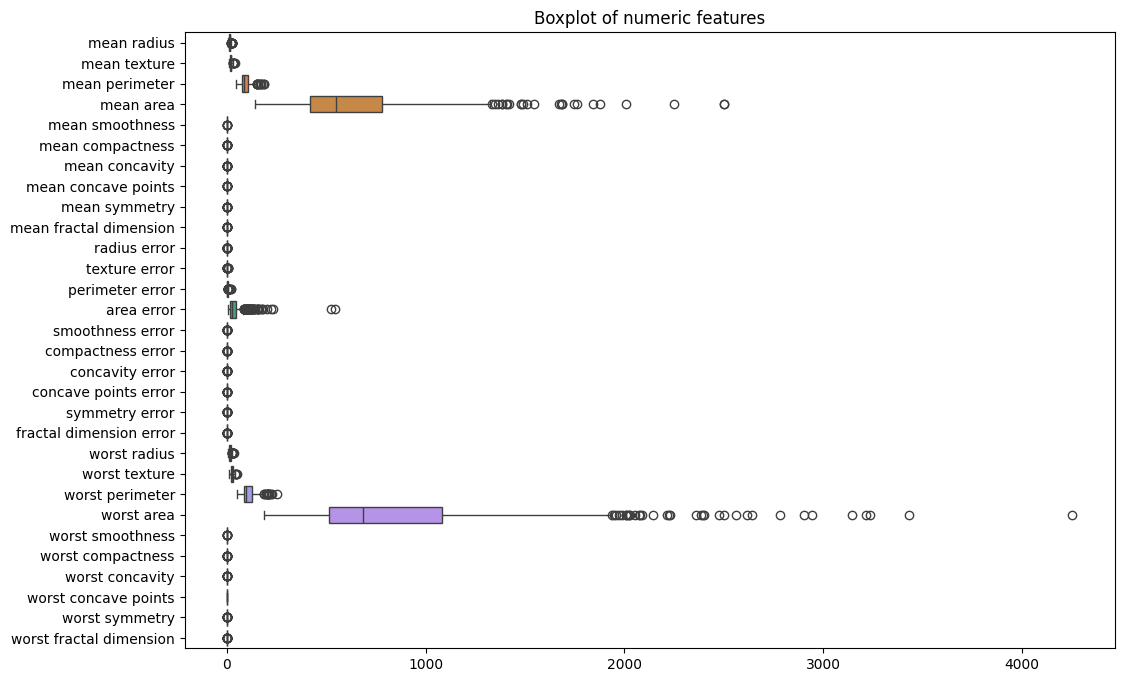

In [ ]:

plt.figure(figsize=(12,8))
sns.boxplot(data=df[df.columns[:-1]],orient='h')
plt.title('Boxplot of numeric features')
plt.show()

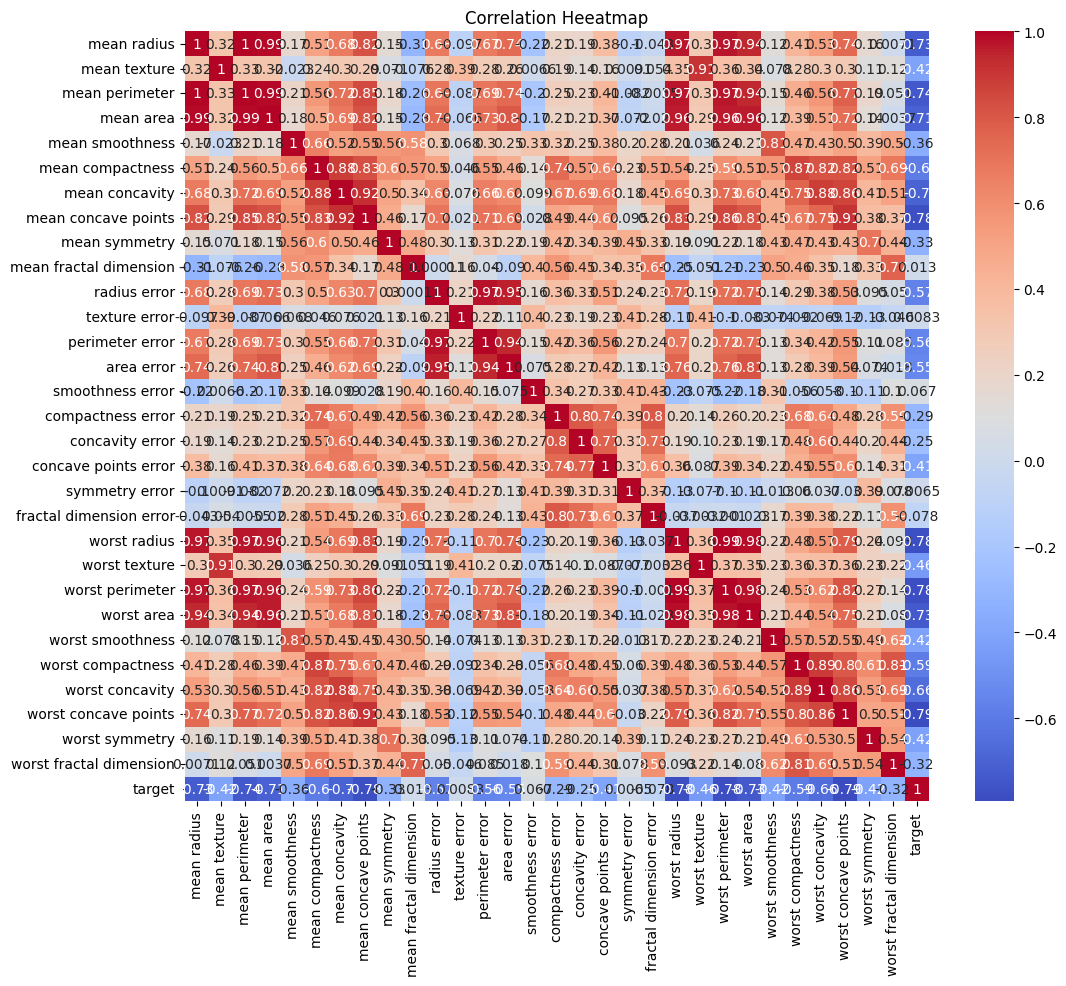

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heeatmap')
plt.show()

In [ ]:
X=df.drop('target',axis=1)
Y=df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
param_grid =[
    {'kernel':['linear'],'C':[0.1,1,10,100]},
    {'kernel':['polynomial'],'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1]},
    {'kernel':['rbf'],'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1,1]}
]
grid = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1],
                          'kernel': ['polynomial']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}],
             scoring='accuracy')

In [ ]:
best_svm = grid.best_estimator_
best_score = grid.best_score_
print(f"Best SVM: {best_svm}")
print(f"Best Score: {best_score}")

Best SVM: SVC(C=10, gamma=0.01)
Best Score: 0.9802197802197803


In [ ]:
Y_pred = best_svm.predict(X_test)
from sklearn.metrics import accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
cr = classification_report(Y_test,Y_pred)
acc = accuracy_score(Y_test,Y_pred)
print(f"Confusion Matrix: \n{cm}")
print(f"Classification Report: \n{cr}")
print(f"Accuracy Score: {acc:0.3f}")

Confusion Matrix: 
[[41  1]
 [ 1 71]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score: 0.982
